In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [3]:
def translate(name):
    #Заменяем пробелы и преобразуем строку к нижнему регистру
    name = name.replace(' ','-').lower()
    transtable = (
        ## Большие буквы
        (u"Щ", u"Sch"),
        (u"Щ", u"SCH"),
        # two-symbol
        (u"Ё", u"Yo"),
        (u"Ё", u"YO"),
        (u"Ж", u"Zh"),
        (u"Ж", u"ZH"),
        (u"Ц", u"Ts"),
        (u"Ц", u"TS"),
        (u"Ч", u"Ch"),
        (u"Ч", u"CH"),
        (u"Ш", u"Sh"),
        (u"Ш", u"SH"),
        (u"Ы", u"Yi"),
        (u"Ы", u"YI"),
        (u"Ю", u"Yu"),
        (u"Ю", u"YU"),
        (u"Я", u"Ya"),
        (u"Я", u"YA"),
        # one-symbol
        (u"А", u"A"),
        (u"Б", u"B"),
        (u"В", u"V"),
        (u"Г", u"G"),
        (u"Д", u"D"),
        (u"Е", u"E"),
        (u"З", u"Z"),
        (u"И", u"I"),
        (u"Й", u"J"),
        (u"К", u"K"),
        (u"Л", u"L"),
        (u"М", u"M"),
        (u"Н", u"N"),
        (u"О", u"O"),
        (u"П", u"P"),
        (u"Р", u"R"),
        (u"С", u"S"),
        (u"Т", u"T"),
        (u"У", u"U"),
        (u"Ф", u"F"),
        (u"Х", u"H"),
        (u"Э", u"E"),
        (u"Ъ", u"`"),
        (u"Ь", u"'"),
        ## Маленькие буквы
        # three-symbols
        (u"щ", u"sch"),
        # two-symbols
        (u"ё", u"yo"),
        (u"ж", u"zh"),
        (u"ц", u"ts"),
        (u"ч", u"ch"),
        (u"ш", u"sh"),
        (u"ы", u"yi"),
        (u"ю", u"yu"),
        (u"я", u"ya"),
        # one-symbol
        (u"а", u"a"),
        (u"б", u"b"),
        (u"в", u"v"),
        (u"г", u"g"),
        (u"д", u"d"),
        (u"е", u"e"),
        (u"з", u"z"),
        (u"и", u"i"),
        (u"й", u"j"),
        (u"к", u"k"),
        (u"л", u"l"),
        (u"м", u"m"),
        (u"н", u"n"),
        (u"о", u"o"),
        (u"п", u"p"),
        (u"р", u"r"),
        (u"с", u"s"),
        (u"т", u"t"),
        (u"ь", u"'"),
        (u"ъ", u"'"),
        (u"у", u"u"),
        (u"ф", u"f"),
        (u"х", u"h"),
        (u"э", u"e"),
    )
    #перебираем символы в таблице и заменяем
    for symb_in, symb_out in transtable:
        name = name.replace(symb_in, symb_out)
    #возвращаем переменную
    return name

In [4]:
location='выборка1.xlsx'
df=pd.read_excel(location)

In [5]:
df.columns=['N','u1','u2']

In [6]:
df.u1=df.u1.map(translate)
df.u2=df.u2.map(translate)

In [10]:
df1 = pd.concat([df.u1, df.u2])
label.fit(df1)
df.u1 = label.transform(df.u1)
df.u2 = label.transform(df.u2)

In [14]:
G=nx.from_pandas_dataframe(df, 'u1','u2'), 'N'

In [19]:
G.edges()

[(0, 33),
 (1, 289),
 (2, 139),
 (3, 124),
 (4, 335),
 (5, 351),
 (6, 471),
 (7, 84),
 (8, 427),
 (9, 279),
 (10, 198),
 (11, 54),
 (12, 39),
 (13, 505),
 (14, 416),
 (15, 58),
 (16, 501),
 (17, 23),
 (18, 258),
 (19, 439),
 (20, 457),
 (21, 229),
 (22, 76),
 (24, 321),
 (25, 142),
 (26, 93),
 (27, 449),
 (28, 494),
 (29, 362),
 (30, 381),
 (31, 79),
 (32, 119),
 (34, 105),
 (35, 338),
 (36, 484),
 (37, 224),
 (38, 282),
 (40, 83),
 (41, 399),
 (42, 67),
 (43, 182),
 (44, 205),
 (45, 118),
 (46, 454),
 (47, 73),
 (48, 356),
 (49, 204),
 (50, 288),
 (51, 320),
 (52, 434),
 (53, 322),
 (55, 402),
 (56, 63),
 (57, 323),
 (59, 256),
 (60, 270),
 (61, 215),
 (62, 487),
 (64, 85),
 (65, 249),
 (66, 303),
 (68, 317),
 (69, 109),
 (70, 243),
 (71, 163),
 (72, 230),
 (74, 404),
 (74, 117),
 (74, 86),
 (74, 326),
 (74, 277),
 (75, 239),
 (77, 358),
 (78, 140),
 (80, 210),
 (81, 483),
 (82, 300),
 (87, 133),
 (88, 116),
 (89, 460),
 (90, 380),
 (91, 302),
 (92, 408),
 (94, 292),
 (95, 307),
 (96,

In [15]:
pos=nx.spring_layout(G)

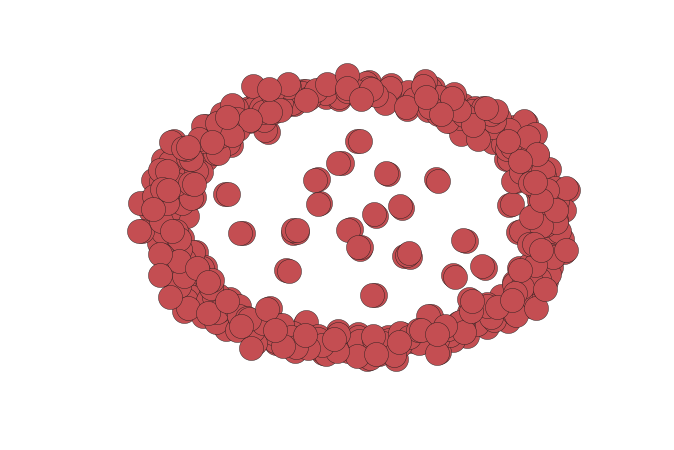

In [21]:
nx.draw(G,nx.spring_layout(G))
#labels=nx.draw_networkx_labels(G,pos)
#plt.savefig('grap.pdf')

In [72]:
H=nx.path_graph(10)
G.add_nodes_from(H)

In [84]:
print (df.u1.value_counts()[:10])
print (df.u2.value_counts()[:10])

74     3
209    2
427    2
287    2
145    1
168    1
190    1
187    1
143    1
186    1
Name: u1, dtype: int64
258    2
74     2
389    2
504    1
161    1
163    1
164    1
165    1
166    1
171    1
Name: u2, dtype: int64
